
Importing libraries

In [1]:
!pip install numpy==1.4.1

  Using cached numpy-1.4.1.tar.gz (2.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\DELL\AppData\Local\Temp\pip-install-25cghzto\numpy_bfe3fde667b349d6baf4a29873d17a78\setup.py", line 18, in <module>
          import __builtin__
      ModuleNotFoundError: No module named '__builtin__'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import numpy as np

In [3]:
print(np.__version__)

2.0.2


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

## data preprocessing


## training image preproccesssing

In [ ]:
trainig_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

## validation image preproccessing

In [57]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 1720 files belonging to 5 classes.


In [60]:
trainig_set 

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [61]:
for x,y in trainig_set:
    print (x,x.shape)
    print (y,y.shape)
    break

tf.Tensor(
[[[[183.      217.      141.     ]
   [183.      217.      141.     ]
   [173.      207.      131.     ]
   ...
   [242.      228.      189.     ]
   [248.      255.      209.     ]
   [255.      248.      209.     ]]

  [[173.      207.      131.     ]
   [173.      207.      131.     ]
   [173.      207.      131.     ]
   ...
   [247.      214.      161.     ]
   [255.      221.      189.     ]
   [252.      238.      199.     ]]

  [[173.      207.      131.     ]
   [163.      197.      121.     ]
   [173.      207.      131.     ]
   ...
   [252.      238.      199.     ]
   [255.      221.      189.     ]
   [255.      221.      189.     ]]

  ...

  [[ 53.       83.       29.     ]
   [ 48.       52.       29.     ]
   [ 18.       22.        0.     ]
   ...
   [ 47.       97.       59.     ]
   [ 57.4375  107.4375   69.4375 ]
   [ 47.       97.       59.     ]]

  [[ 38.       42.       19.     ]
   [ 18.       22.        0.     ]
   [ 28.       32.        9.     ]
 

To avoid Overshooting

Choose a small learning rate. By default, 0.001 is used; here, we are taking 0.0001. There may be a chance of underfitting, so increase the number of neurons. Add more convolution layers to extract more features from images. There may be a possibility that the model is unable to capture relevant features or is confused due to a lack of features, so feed it with more features.

## Building Model

In [71]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [72]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [73]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [75]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [76]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [77]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [78]:
model.add(Dropout(0.25))## to avoid overfiting

In [79]:
model.add(Flatten())

In [80]:
model.add(Dense(units=1500,activation='relu'))

In [81]:
model.add(Dropout(0.4))

In [82]:
## Ouput layer

In [83]:
model.add(Dense(units=5,activation='softmax'))

## Compiling Model

In [84]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## Model training

In [86]:
training_history = model.fit(x=trainig_set,validation_data=validation_set,epochs=10)

Epoch 1/10
54/54 [==============================] - 610s 11s/step - loss: 1.6494 - accuracy: 0.3564 - val_loss: 1.2402 - val_accuracy: 0.4320
Epoch 2/10
54/54 [==============================] - 495s 9s/step - loss: 1.1750 - accuracy: 0.4948 - val_loss: 0.9966 - val_accuracy: 0.5930
Epoch 3/10
54/54 [==============================] - 495s 9s/step - loss: 1.0313 - accuracy: 0.5442 - val_loss: 0.8708 - val_accuracy: 0.6320
Epoch 4/10
54/54 [==============================] - 495s 9s/step - loss: 0.8757 - accuracy: 0.6337 - val_loss: 0.7238 - val_accuracy: 0.7267
Epoch 5/10
54/54 [==============================] - 437s 8s/step - loss: 0.7348 - accuracy: 0.7209 - val_loss: 0.5321 - val_accuracy: 0.8041
Epoch 6/10
54/54 [==============================] - 158s 3s/step - loss: 0.5411 - accuracy: 0.7826 - val_loss: 0.4190 - val_accuracy: 0.8407
Epoch 7/10
54/54 [==============================] - 220s 4s/step - loss: 0.4839 - accuracy: 0.8151 - val_loss: 0.3709 - val_accuracy: 0.8517
Epoch 8/10
5

## Model evaluation

In [100]:
#model Evaluation on trainig set
train_loss,train_acc = model.evaluate(trainig_set)

54/54 [==============================] - 37s 636ms/step - loss: 0.1280 - accuracy: 0.9610


In [92]:
print(train_loss,train_acc) 

0.1280364692211151 0.9610465168952942


In [93]:
#model Evaluation on validation set
valid_loss,valid_acc = model.evaluate(validation_set)

54/54 [==============================] - 42s 687ms/step - loss: 0.1280 - accuracy: 0.9610


In [101]:
print(valid_loss,train_acc)

0.1280364692211151 0.9610465168952942


## Saving Model

In [103]:
model.save("trained_model.keras")

In [104]:
training_history.history

{'loss': [1.6493676900863647,
  1.1749988794326782,
  1.0312789678573608,
  0.8757178783416748,
  0.7348073720932007,
  0.5411403179168701,
  0.48387429118156433,
  0.3743269145488739,
  0.3050183951854706,
  0.19206060469150543],
 'accuracy': [0.35639533400535583,
  0.494767427444458,
  0.5441860556602478,
  0.6337209343910217,
  0.7209302186965942,
  0.7825581431388855,
  0.815116286277771,
  0.8622093200683594,
  0.8883720636367798,
  0.9308139681816101],
 'val_loss': [1.240195631980896,
  0.9966468214988708,
  0.8707744479179382,
  0.7237622737884521,
  0.5320978760719299,
  0.41901451349258423,
  0.37088438868522644,
  0.17591898143291473,
  0.20988228917121887,
  0.1280364692211151],
 'val_accuracy': [0.4319767355918884,
  0.5930232405662537,
  0.6319767236709595,
  0.7267441749572754,
  0.8040697574615479,
  0.8406976461410522,
  0.8517441749572754,
  0.9476743936538696,
  0.9308139681816101,
  0.9610465168952942]}

In [107]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [109]:
training_history.history['accuracy']

[0.35639533400535583,
 0.494767427444458,
 0.5441860556602478,
 0.6337209343910217,
 0.7209302186965942,
 0.7825581431388855,
 0.815116286277771,
 0.8622093200683594,
 0.8883720636367798,
 0.9308139681816101]

# Accuracy visualization

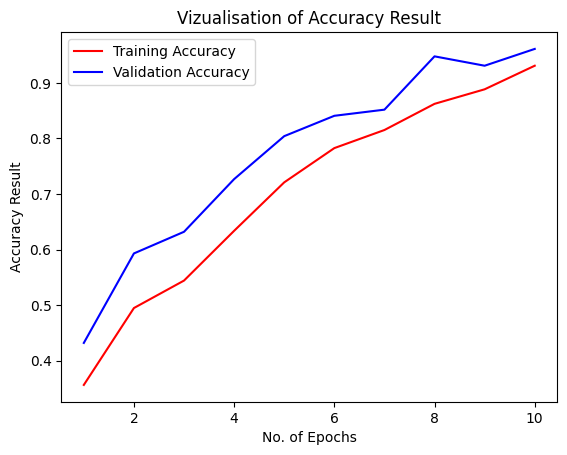

In [116]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Vizualisation of Accuracy Result")
plt.legend()
plt.show()

## some other metrcis for model evaluation

In [117]:
class_name = validation_set .class_names
class_name

['ALTERNARIA LEAF SPOT',
 'HEALTHY',
 'LEAF SPOT (EARLY AND LATE)',
 'ROSETTE',
 'RUST']

In [118]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 1720 files belonging to 5 classes.


In [120]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

54/54 [==============================] - 89s 2s/step


(array([[9.9498546e-01, 1.4264719e-04, 4.1133584e-03, 6.1038486e-04,
         1.4813790e-04],
        [9.9991083e-01, 7.1682663e-08, 7.7568635e-05, 7.4165987e-06,
         4.1021249e-06],
        [9.9942005e-01, 5.6348317e-06, 5.7360233e-04, 4.7988146e-07,
         1.9526836e-07],
        ...,
        [7.5443918e-03, 3.7659679e-06, 3.8947041e-05, 9.1586197e-03,
         9.8325425e-01],
        [3.6191218e-02, 1.2126601e-05, 1.4240796e-03, 8.9206686e-03,
         9.5345187e-01],
        [3.8756288e-03, 5.5190426e-04, 4.0898491e-03, 3.9869230e-02,
         9.5161337e-01]], dtype=float32),
 (1720, 5))

In [121]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(1720,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [123]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1720, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [124]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1720,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

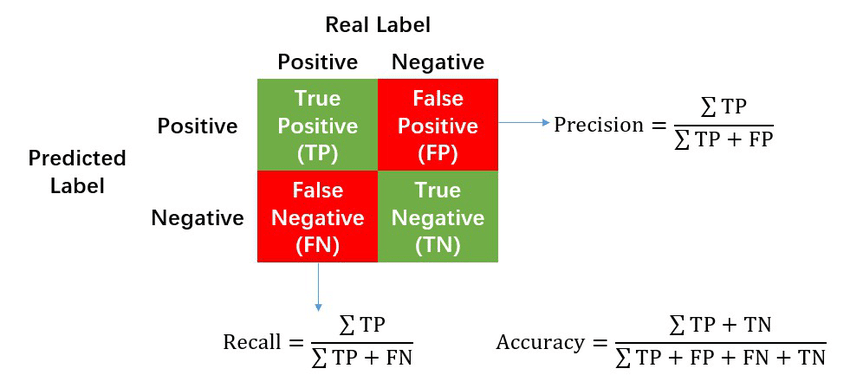

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.92      1.00      0.96       450
                   HEALTHY       0.96      1.00      0.98       600
LEAF SPOT (EARLY AND LATE)       0.99      0.88      0.93       450
                   ROSETTE       0.96      0.96      0.96       100
                      RUST       1.00      0.96      0.98       120

                  accuracy                           0.96      1720
                 macro avg       0.97      0.96      0.96      1720
              weighted avg       0.96      0.96      0.96      1720



In [138]:
cm = confusion_matrix(Y_true,predicted_categories) 
cm.shape

(5, 5)

## Confusion Matrix visualisation

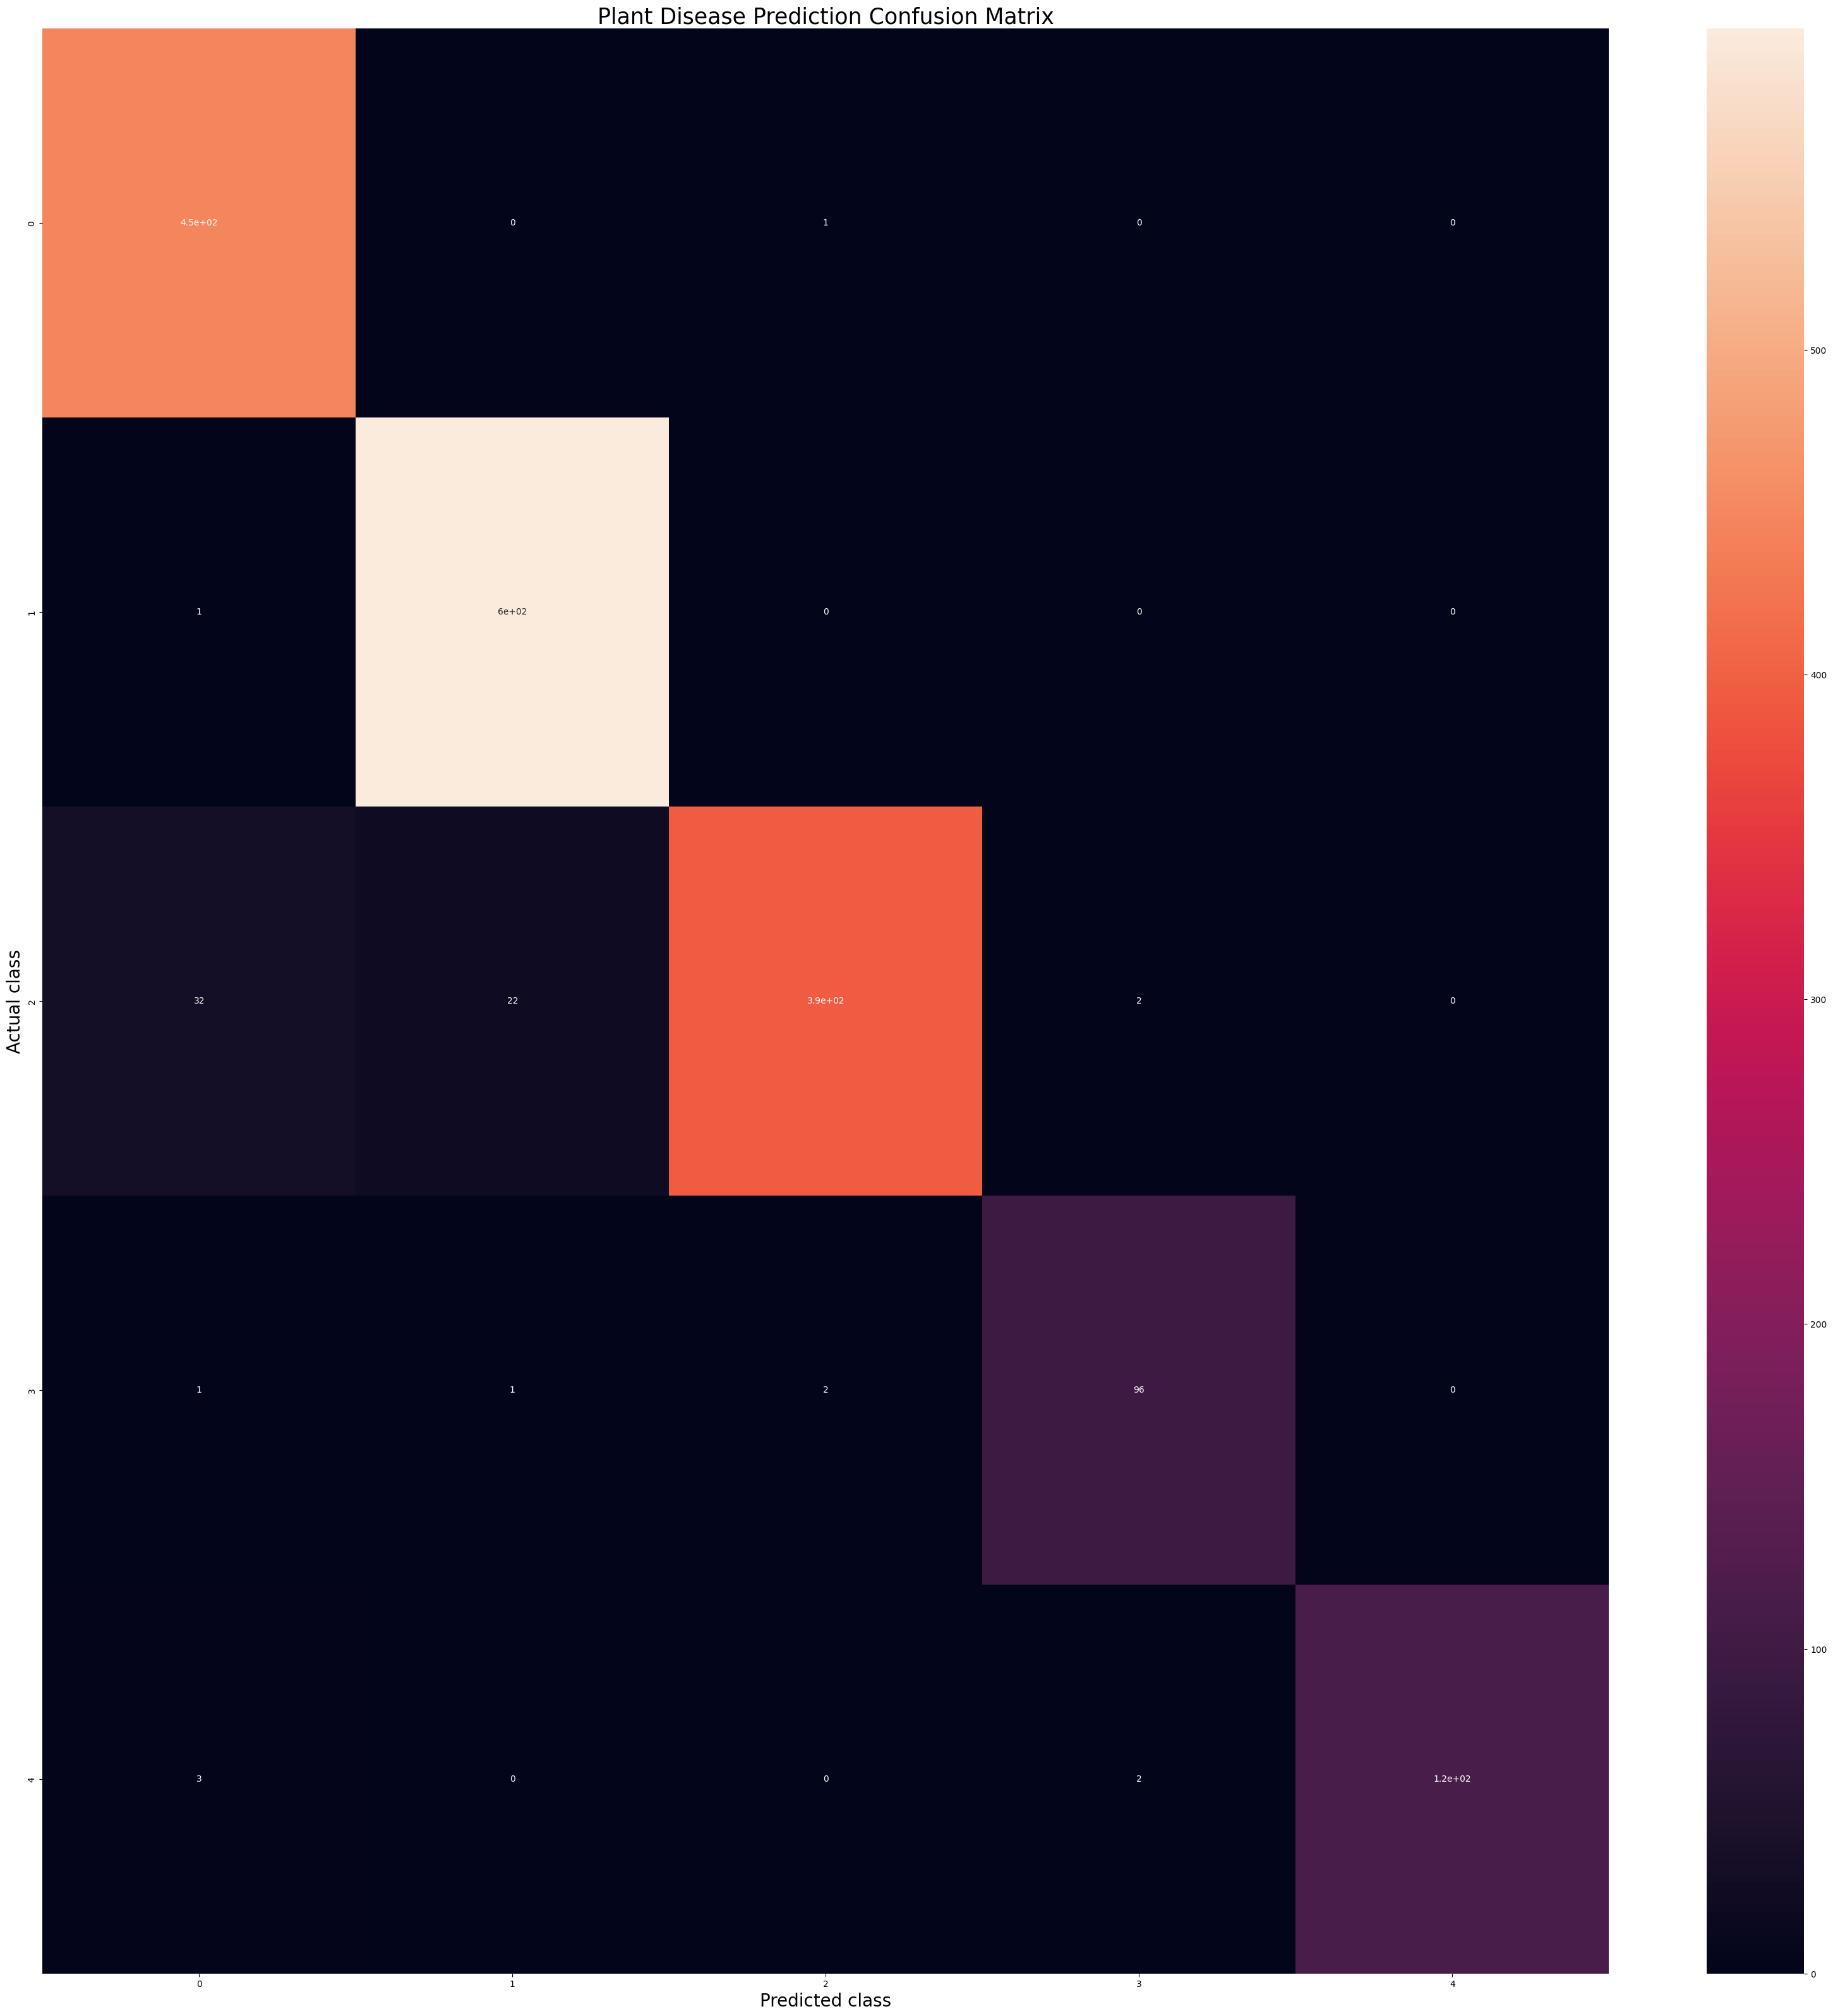

In [145]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()